In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def convertion(results):
    new_results = results.copy()
    
    # String to dictionary
    new_results['hyperparameters'] = new_results['hyperparameters'].map(ast.literal_eval)
    
    # Sort
    new_results = new_results.sort_values('score', ascending = False).reset_index(drop = True)
    
    print('The highest cross validation ROC_AUC from XGBoost is {:.5f} found on iteration {}'.format(new_results['score'][0], new_results['iteration'][0]))
    
    best_param = new_results['hyperparameters'][0]
    
    hyp_df = pd.DataFrame()
    
    hyp_df['iteration'] = new_results['iteration']
    hyp_df['score'] = new_results['score']
    
    return best_param, hyp_df

In [4]:
rf_results = pd.read_csv('Automated_Tuning.csv')
best_param, hyp_df = convertion(rf_results)

The highest cross validation ROC_AUC from XGBoost is 0.77327 found on iteration 47


In [5]:
hyp_df.head()

,iteration,score
0,47,0.773270
1,66,0.773172
2,69,0.773064
3,71,0.773061
4,100,0.772919


D:\Anaconda\envs\data-x\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


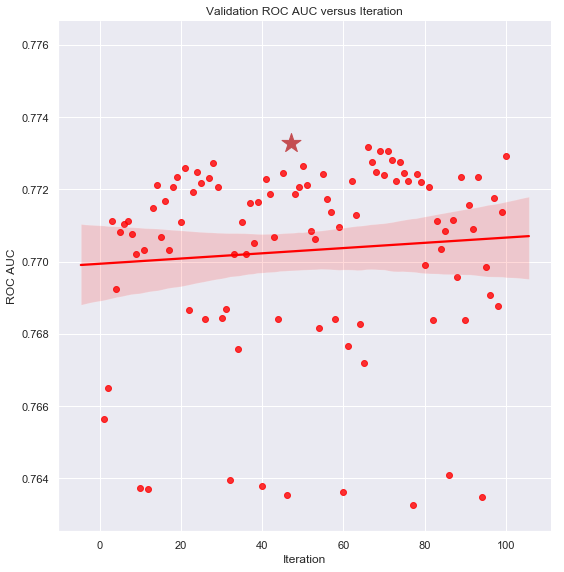

In [6]:
# Plot the score change through iterations
sns.set()
sns.lmplot('iteration', 'score', data = hyp_df, height = 8, line_kws={'color': 'red'}, scatter_kws = {'color': 'red'})
plt.scatter(hyp_df['iteration'][0], hyp_df['score'][0], marker = '*', s = 400, c = 'r')
plt.xlabel('Iteration')
plt.ylabel('ROC AUC')
plt.title("Validation ROC AUC versus Iteration")
plt.show()

In [7]:
import pickle
with open('XGB_best_param.pkl', 'wb') as file:
    pickle.dump(best_param, file)